# [Elementary Cellular Automata](https://mathworld.wolfram.com/ElementaryCellularAutomaton.html)

Elementary cellular automata are one dimensional sequences of ones and zeroes that evolve based upon a set of rules. These rules are defined by an 8-bit mask such as 90 (01011010) and mapped to a set of potential combinations for each character and its two neighbors. 

## Terms

- **Initial State** – Generate zero. For the patterns we'll explore in this notebook, this state will be hardcoded to all zeroes with a single one in the middle of the string.

- **Next Generation** – The subsequent state of the automaton when evaluated against the rule book.

- **Rule Book** – The resulting patterns that can be matched for each character and its two neighbors.

## Evolution

The rule book is determined by the rule number passed in with each bit in the number defining the outcome of a combination of numbers. For example, rule 90's bits are 01011010, so these are the results of the eight possible combinations:

```
bin(90) = 0 1 0 1 1 0 1 0

111 = 0   110 = 1   101 = 0   100 = 1   011 = 1   010 = 0   001 = 1   000 = 0
```

In each generation every character is considered with its neighbors on either side and evaluated against the above rules. The result is the next generation.

---

`window` produces a triplet for each position in a state.

In [1]:
def window(state, length=3):
    for i in range(1, len(state) - length + 2):
        yield tuple(state[i-1:i+length-1])

---

`rule_book` generates a dictionary of rules indexed by triplet. This will always start with `1 1 1` and end with `0 0 0` by convention, and the bit yielded by that field will be defined by the passed mask.

In [2]:
from itertools import product


def rule_book(rule):
    mask = [int(bit) for bit in f'{rule:08b}']
    bits = sorted(product([0, 1], repeat=3), reverse=True)
    
    return {rule: bit for rule, bit in zip(bits, mask)}


rule_book(90)

{(1, 1, 1): 0,
 (1, 1, 0): 1,
 (1, 0, 1): 0,
 (1, 0, 0): 1,
 (0, 1, 1): 1,
 (0, 1, 0): 0,
 (0, 0, 1): 1,
 (0, 0, 0): 0}

---

For the given rule, `run` yields each generation up to the provided number of generations.

In [3]:
def run(rule, generations):
    rules = rule_book(rule)
    state = [0] * generations + [1] + [0] * generations
    
    for _ in range(generations):
        yield state
        state = [0] + [rules[triplet] for triplet in window(state)] + [0]

---

Using Matplotlib, `draw` generates an image of the automaton for the given rule up to the given number of generations.

In [4]:
import matplotlib.pyplot as plt


def draw(rule, generations=150):
    fig, ax = plt.subplots(figsize=(16, 9))

    ax.set_title(f'Rule {rule}', fontsize=18, fontweight='bold')
    ax.imshow(list(run(rule, generations)), cmap='gnuplot2')
    ax.axis(False);

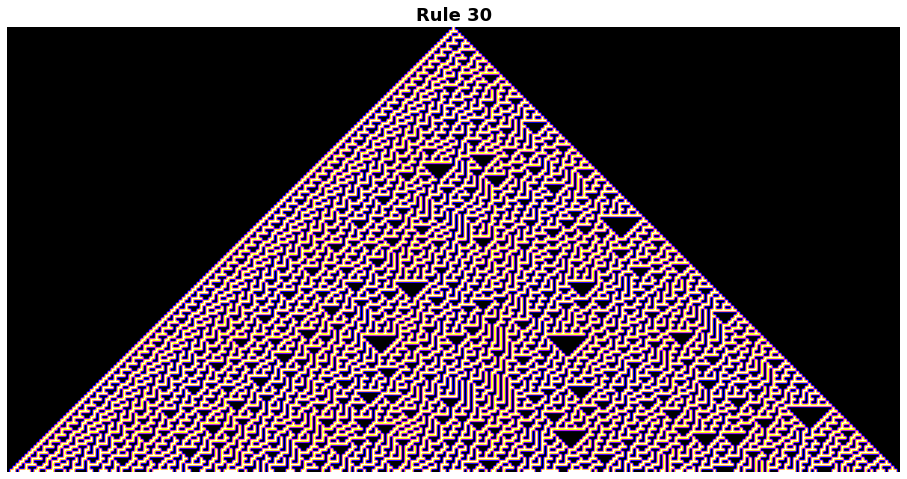

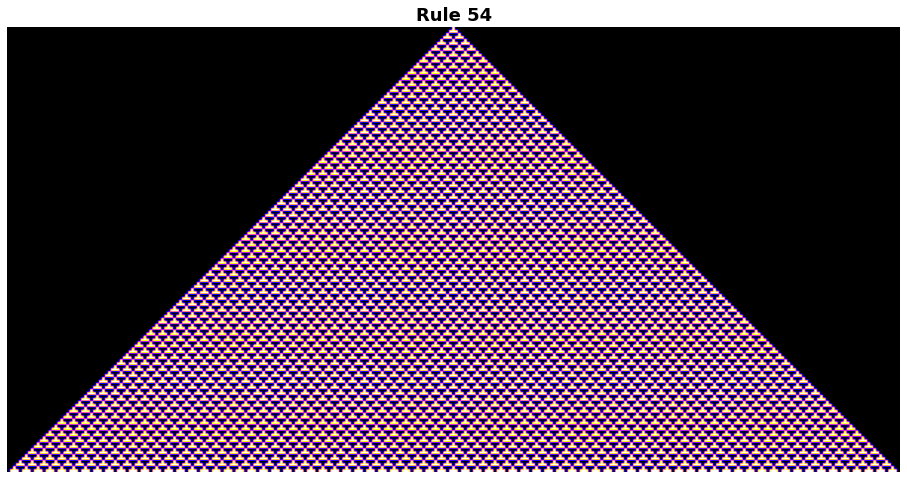

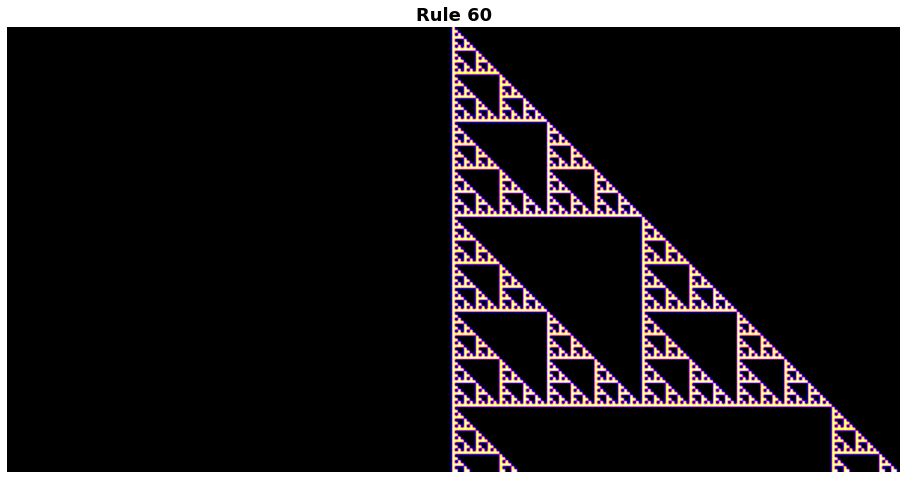

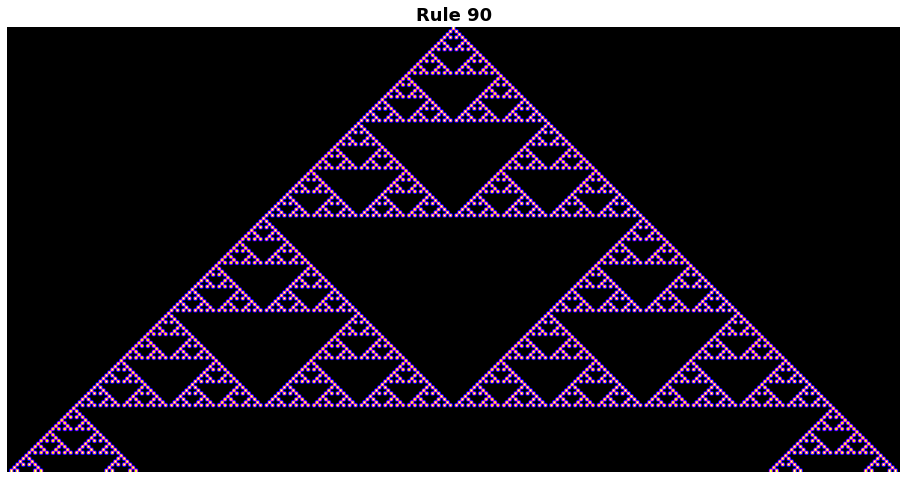

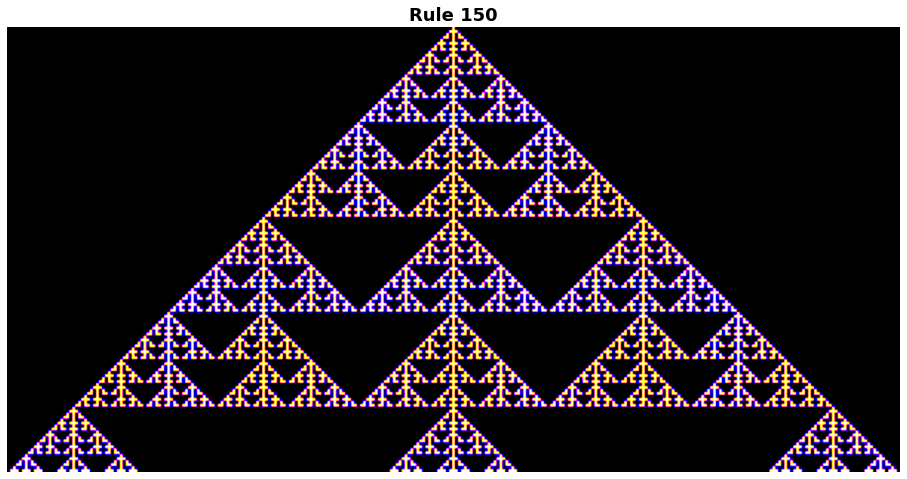

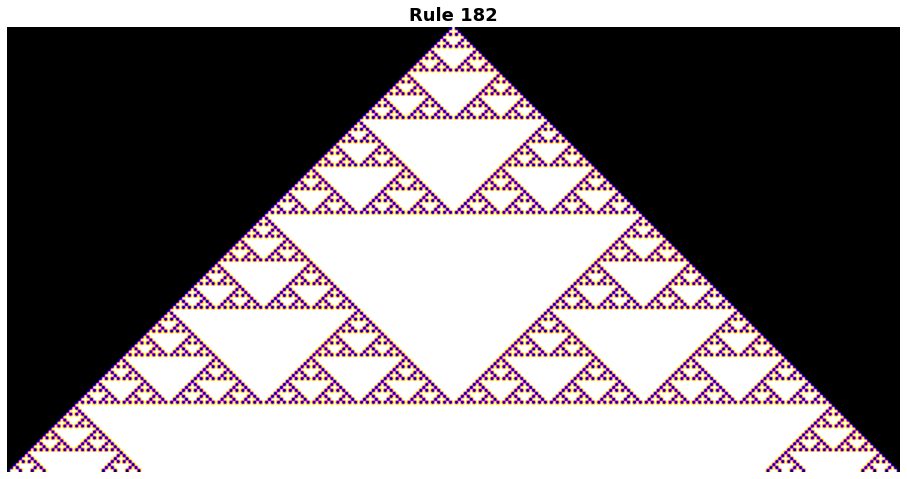

In [5]:
draw(30)
draw(54)
draw(60)
draw(90)
draw(150)
draw(182)

plt.show()